<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 200px; display: inline" alt="IMT"/> </a>
</center>

# [Ateliers: Technologies des grosses data](https://github.com/wikistat/Ateliers-Big-Data)

# [Reconnaissance d'Activité Humaine](https://github.com/wikistat/Ateliers-Big-Data/5-HumanActivityRecognition) ([*HAR*](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)) en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>
##  Première étape:  étude des variables "métier"

## 1 Introduction
### 1.1 Contexte
Les données sont issues de la communauté qui vise la reconnaissance d'activités humaines (*Human activity recognition, HAR*) à partir d’enregistrements, par exemple du gyroscope et de l'accéléromètre d'un smartphone, objet connecté précurseur et dont la fonctionnalité de téléphonie devient très secondaire.
Voir à ce propos l'[article](https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-11.pdf) relatant un colloque de 2013.  

Les données publiques disponibles et largement étudiées ont été acquises, décrites et analysées par [Anguita et al. (2013)]().
Elles sont accessibles sur le [dépôt](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) de l'University California Irvine (UCI) consacré à l'apprentissage machine ainsi que sur le site *Kaggle*.

L'archive contient les données brutes: accélérations en x, y, et z, chacun de 128 colonnes. D'autres fichiers en y soustrayant la gravité naturelle ainsi que les accélérations angulaires en x, y, et z soit en tout 9 fichiers. Mais 6 utiles avec 6*128=768 mesures.

Elle contient également deux fichiers "train" et "test" de *features* ou variables métier calculées dans les domaines temporels et fréquentiels: 561 variables.

Les données sont labellisées avec 6 activités: debout, assis, couché, marche, monter ou descendre un escalier. Il s'agit donc, en première lecture, d'un problème de classification supervisée (6 classes) avec 10299 observations (apprentissage  et trest) décrites par 561 variables.

Voici une liste indicative des variables calculées sur chacune des variables initiales et couples de variables:

Name|Signification
-|-
mean | Mean value
std | Standard deviation
mad | Median absolute value
max | Largest values in array
min | Smallest value in array
sma | Signal magnitude area
energy | Average sum of the squares
iqr | Interquartile range
entropy | Signal Entropy
arCoeff | Autorregresion coefficients
correlation | Correlation coefficient
maxFreqInd | Largest frequency component
meanFreq | Frequency signal weighted average
skewness | Frequency signal Skewness
kurtosis | Frequency signal Kurtosis
energyBand | Energy of a frequency interval
angle | Angle between two vectors

### 1.2 Objectifs
Cette première étape s'intéresse aux seules variables construites à partir des connaissances *a priori* du comportement des capteurs en fonction des types d'activité humaine. Ce premier calepin propose une exploration et une modélisation, sans effort d'optimisation (paramètres par défaut), des 561 variables métier. Quelle méthode ou algorihtme d'apprentissage permet de déterminer au mieux l'activité humaine? 

Une deuxième étape à venir s'intéresse aux données brutes. Est-il possible d'économiser le travail préliminaire de définition des variables métier en utilisant par exemple les ressources de décompositions systématiques sur une base d'ondelette ou un algorihtme d'apprentissage profond?

### 1.3 Travail à réaliser
- Exploration avec notamment une analyse en composantes principales
- Modélisation, prévision de l'échantillon test par
   - régression logistique
   - $k$ plus proches voisins
   - SVM
   - Random Forest
   - Gradient boosting
   - XGBoost
   - Réseau de neurones
- Ajouter à ce calepin: optimisation des paramètres des différentes méthodes

## 2 Lecture des données d'apprentissage

In [3]:
# Graphiques dans la fenêtre
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

Les données peuvent être préalablement téléchargées ou directement lues. Ce sont celles originales du dépôt de l'[UCI](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). 

In [4]:
# Lecture des données d'apprentissage
# Attention, il peut y avoir plusieurs espaces comme séparateur
path_s="./../data_har"
path_e="~/Documents/Projet_Human_Recog_Activity/UCI HAR Dataset/"
Xtrain=pd.read_table(path_e+"train/X_train.txt",sep='\s+',header=None)
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
ytrain=pd.read_table(path_e+"train/y_train.txt",sep='\s+',header=None,names=('y'))
ytrain.head()

,y
0,5
1,5
2,5
3,5
4,5


In [6]:
# Lecture des données de test
# Attention, il peut y avoir plusieurs espaces comme séparateur
Xtest=pd.read_table(path_e+"test/X_test.txt",sep='\s+',header=None)

In [7]:
ytest=pd.read_table(path_e+"test/y_test.txt",sep='\s+',header=None,names=('y'))

## 3 Exploration

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Fonction de représentation des plans factoriels

In [22]:
label_dic = {1 : "WALKING",
2 : "WALKING UPSTAIRS",
3 : "WALKING DOWNSTAIRS",
4 : "SITTING",
5 : "STANDING",
6 : "LAYING"}

def plot_pca(X_R,fig,ax,nbc,nbc2):
    for i in range(6):
        xs = X_r[ytrain["y"]==i+1,nbc-1]
        ys = X_r[ytrain["y"]==i+1, nbc2-1]
        label = label_dic[i+1]
        color = cmaps(i)
        ax.scatter(xs, ys, color=color, alpha=.8, s=1, label=label)
        ax.set_xlabel("PC%d : %.2f %%" %(nbc,pca.explained_variance_ratio_[nbc-1]*100), fontsize=10)
        ax.set_ylabel("PC%d : %.2f %%" %(nbc2,pca.explained_variance_ratio_[nbc2-1]*100), fontsize=10)

In [23]:
pca = PCA()
X_r = pca.fit_transform(Xtrain)

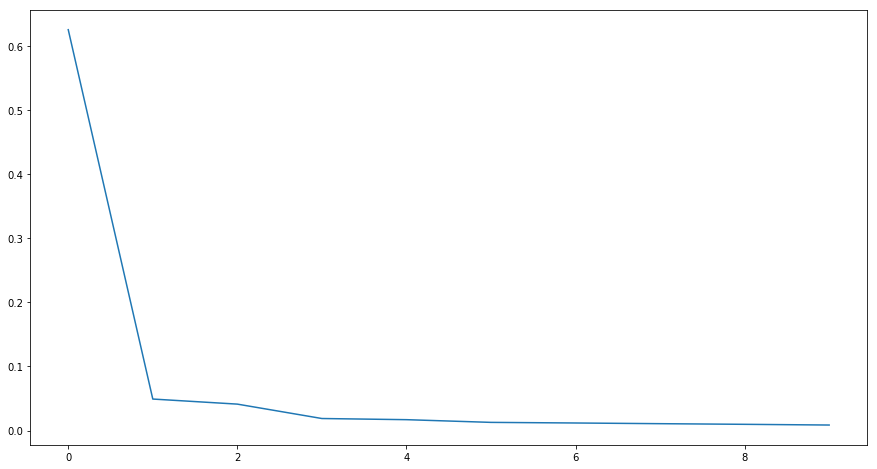

In [24]:
## Décroissance des premières valeurs propres
plt.figure(figsize=(15,8))
plt.plot(pca.explained_variance_ratio_[0:10])
plt.show()

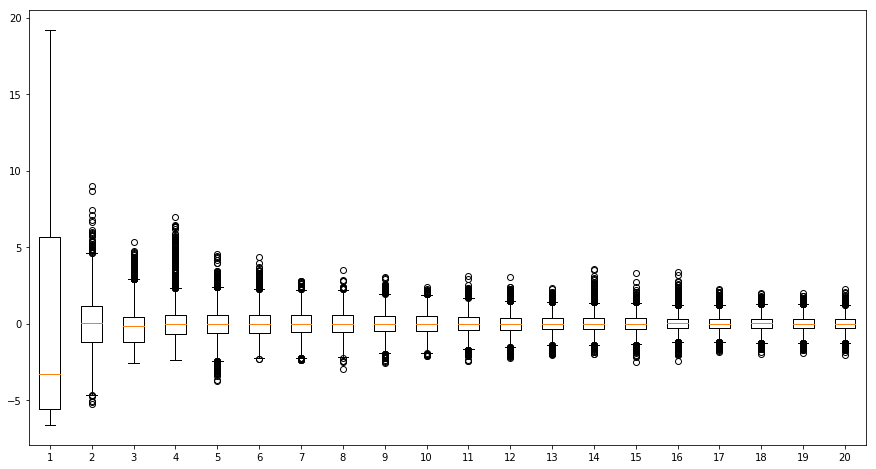

In [25]:
## distribution des premières composantes principales
plt.figure(figsize=(15,8))
plt.boxplot(X_r[:,0:20])
plt.show()

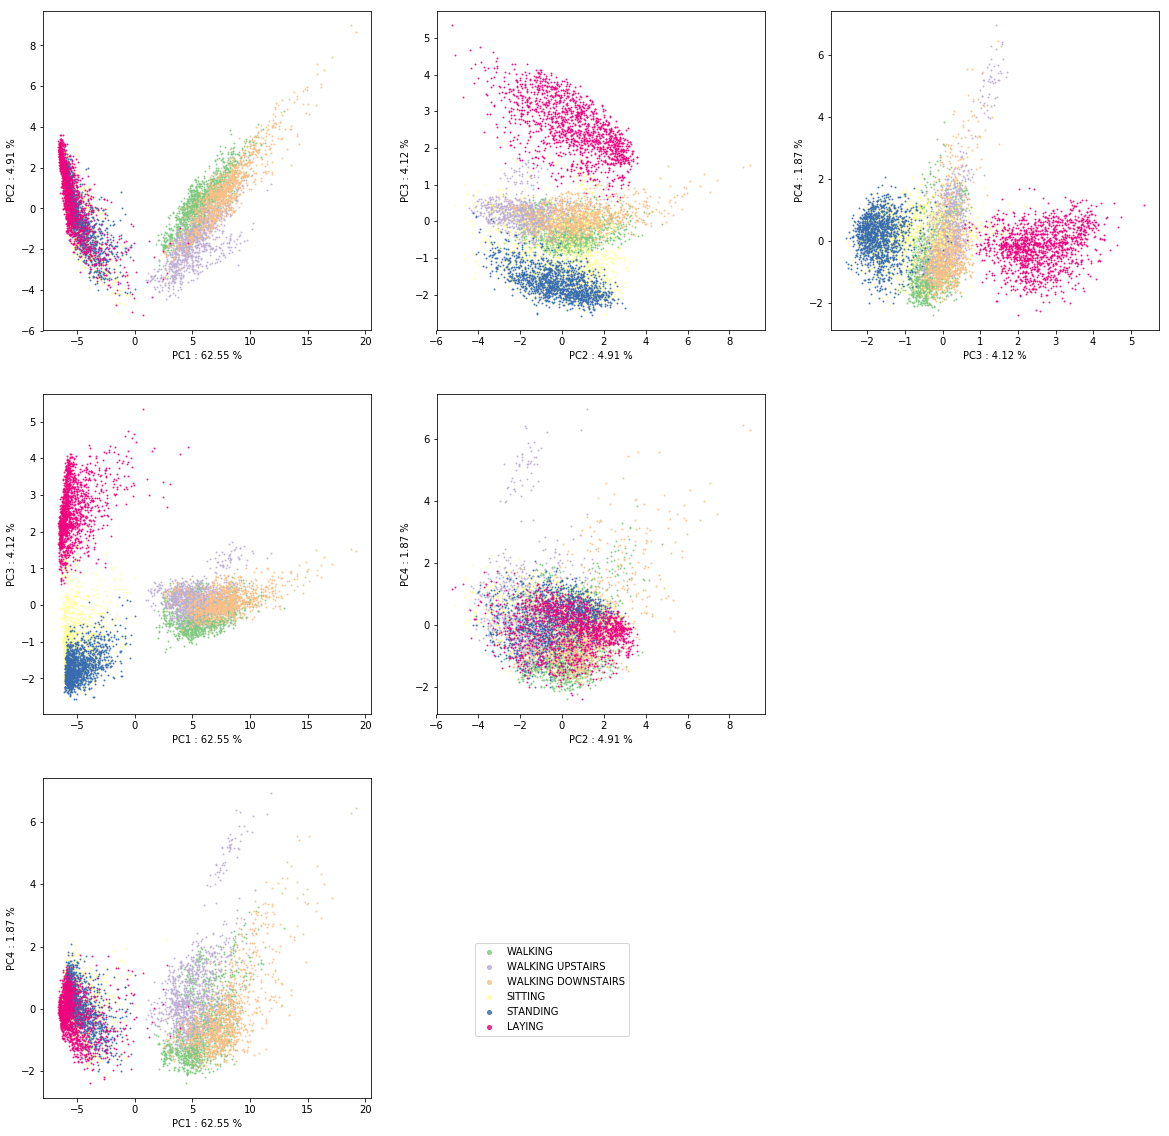

In [26]:
cmaps = plt.get_cmap("Accent")

fig = plt.figure(figsize= (20,20))
count = 0
for nbc, nbc2,count in [(1,2,1), (2,3,2), (3,4,3), (1,3,4), (2,4,5), (1,4,7)] :
    ax = fig.add_subplot(3,3,count)
    plot_pca(X_r, fig,ax,nbc,nbc2)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 0.5), markerscale=4)

**Q** Commenter    
La première composante résume la majorité de l'information (62%). Cependant, quand on observe le graphe sur les axes 2 et 3, on voit que la 3ème composante discrimine bien les classes d'activités. 

**Q** Représenter les variables   
Il est difficile d'obtenir un graphe clair pour représenter les variables car il y en a 560 : le graphe est illisible ! 

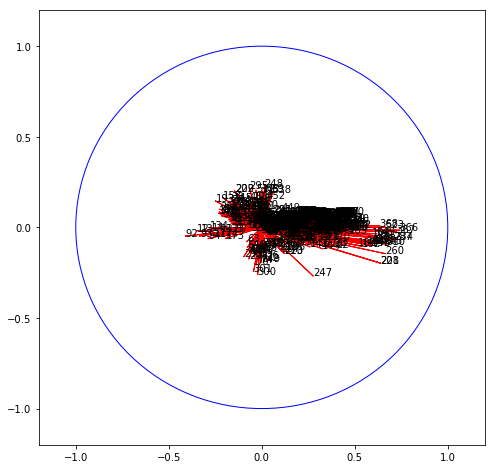

In [29]:
# coordonnées des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, Xtrain.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='r')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='b', fill=False)
ax.add_patch(c)
plt.show()

## 4 Apprentissage et prévision du test

In [10]:
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
ytrain=ytrain["y"]
ytest=ytest["y"]
LABELS = ["WALKING","WALKING UPSTAIRS","WALKING DOWNSTAIRS","SITTING","STANDING","LAYING"]

### Régression logistique

In [31]:
ts = time.time()
method = LogisticRegression()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()

In [32]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.961995, time running : 3 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,494,0,2,0,0,0
WALKING UPSTAIRS,23,448,0,0,0,0
WALKING DOWNSTAIRS,4,9,407,0,0,0
SITTING,0,4,0,432,55,0
STANDING,2,0,0,13,517,0
LAYING,0,0,0,0,0,537


### Analyse discriminante linéaire

In [37]:
ts = time.time()
method = LinearDiscriminantAnalysis()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

/usr/local/insa/anaconda/envs/GPU/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [38]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.962335, time running : 0 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,490,6,0,0,0,0
WALKING UPSTAIRS,11,460,0,0,0,0
WALKING DOWNSTAIRS,1,14,405,0,0,0
SITTING,0,1,0,434,56,0
STANDING,0,0,0,22,510,0
LAYING,0,0,0,0,0,537


*Remarque:* l'analyse discriminante quadratique pose un problème lors de l'inversion des matrices de covariance intraclasse.

### *K* plus proches voisins

In [39]:
ts = time.time()
method = KNeighborsClassifier(n_jobs=-1)
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [40]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.901595, time running : 6 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,485,2,9,0,0,0
WALKING UPSTAIRS,40,424,7,0,0,0
WALKING DOWNSTAIRS,45,45,330,0,0,0
SITTING,0,3,0,389,99,0
STANDING,0,0,0,37,495,0
LAYING,0,0,0,2,1,534


### *Random forest*

In [45]:
ts = time.time()
method = RandomForestClassifier(n_estimators=200,n_jobs=-1)
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [46]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.929420, time running : 4 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,482,7,7,0,0,0
WALKING UPSTAIRS,35,429,7,0,0,0
WALKING DOWNSTAIRS,20,37,363,0,0,0
SITTING,0,0,0,437,54,0
STANDING,0,0,0,41,491,0
LAYING,0,0,0,0,0,537


### *Gradient boosting*

In [47]:
ts = time.time()
method = GradientBoostingClassifier()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [48]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.937903, time running : 125 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,486,5,5,0,0,0
WALKING UPSTAIRS,24,439,7,1,0,0
WALKING DOWNSTAIRS,7,26,387,0,0,0
SITTING,0,2,0,417,72,0
STANDING,0,0,0,34,498,0
LAYING,0,0,0,0,0,537


### SVM linéaire

In [49]:
ts = time.time()
method = LinearSVC()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [50]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.966067, time running : 3 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,496,0,0,0,0,0
WALKING UPSTAIRS,17,454,0,0,0,0
WALKING DOWNSTAIRS,2,5,413,0,0,0
SITTING,0,4,0,426,59,2
STANDING,1,0,0,10,521,0
LAYING,0,0,0,0,0,537


### SVM avec noyau gaussien

In [51]:
ts = time.time()
method = SVC()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [52]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.940278, time running : 14 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,492,0,4,0,0,0
WALKING UPSTAIRS,17,452,2,0,0,0
WALKING DOWNSTAIRS,13,29,378,0,0,0
SITTING,0,2,0,424,65,0
STANDING,0,0,0,44,488,0
LAYING,0,0,0,0,0,537


### XGBoost

In [1]:
from xgboost import XGBClassifier

/usr/local/insa/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
ts = time.time()
method = XGBClassifier()
method.fit(Xtrain,ytrain)
score = method.score(Xtest, ytest)
ypred = method.predict(Xtest)
te = time.time()
t_total = te-ts

In [13]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ytest, ypred), index = LABELS, columns=LABELS)

Score : 0.939600, time running : 24 secondes


,WALKING,WALKING UPSTAIRS,WALKING DOWNSTAIRS,SITTING,STANDING,LAYING
WALKING,488,3,5,0,0,0
WALKING UPSTAIRS,25,439,7,0,0,0
WALKING DOWNSTAIRS,8,28,384,0,0,0
SITTING,0,2,0,421,68,0
STANDING,0,0,0,32,500,0
LAYING,0,0,0,0,0,537


## 5 Travail à réaliser
### 5.1 Sur les mêmes données
- Tester `XGBoost` 
- Tester l'apprentissage profond avec `keras`
- **Optimiser** les paramètres

### 5.2 Deuxième étape sur les données brutes
- Apprentissage sur les décompositons en ondelettes
- Apprentissage profond 